# Laboratorio 1: Conceptos básicos de aprendizaje automático

### Boston Set

In [1]:
# Requiere la carpeta de scripts ml
%matplotlib inline
# Auxiliary
from aux_func import *

## Regresión

### Carga de datos

In [2]:
boston_data = load_boston()

# Utilizamos aproximadamente 80% de los datos para entrenamiento y 20% para validación
shuff_data = np.random.permutation(506)
shuff_train = shuff_data[:400]
shuff_val = shuff_data[400:]

X_train = boston_data['data'][shuff_train]
X_val = boston_data['data'][shuff_val]

y_train = boston_data['target'][shuff_train]
y_val = boston_data['target'][shuff_val]

# Necesario para poder hacer un regresor por feature
feature_map = {feature: idx for idx, feature in enumerate(boston_data['feature_names'])}

print(boston_data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Regresión sin regularización

Para revisar como afecta el cambio de parámetros y los distintos tipos de regresores y atributos (características) al resultado final del algoritmo de aprendizaje automático, lo que se va a hacer es entrenar el regresor tomando sólo un atributo y visualizar eso.

Se busca entrenar utilizando el conjunto de entrenamiento (el terminado en `train`) y evaluar utilizando el conjunto de validación (el terminado en `val`). Luego se visualiza la función calculada para cada conjunto y se la compara.

Los atributos posibles están listados en la descripción del conjunto de datos en la celda anterior. No todos son útiles para visualizar, en particular solo nos interesan los atributos numéricos y descartamos los atributos que se listan a continuación:

- `CHAS`: Atributo categórico (toma valor 0 o 1).
- `RAD`: Atributo categórico (índice).
- `MEDV`: Este valor se lo lista como atributo en la descripción del conjunto de datos pero en realidad es el valor de `y`, i.e. es el valor que tratamos de aproximar con el algoritmo de aprendizaje automático.

In [3]:
# Seleccionamos un atributo de los listados en la descripción que no sea categórico
#selected_feature = 'AGE'  # TODO: modificar esto por algún otro valor para ver como cambian los resultados
selected_feature = 'NOX'  # DONE
feature_col = feature_map[selected_feature]
X_train_feature = X_train[:, feature_col].reshape(-1, 1)  # Hay que ser que sea una matriz no un vector para que funcione con scikit learn
X_val_feature = X_val[:, feature_col].reshape(-1, 1)

#### Regresión lineal

In [4]:
# Entrenamos un clasificador utilizando sólo ese atributo sobre el conjunto de entrenamiento (X_train, y_train)
model = LinearRegression()
model.fit(X_train_feature, y_train)

# Evaluamos el desempeño del clasificador utilizando la media del error cuadrado (MSE o mean squared error)
# sobre el conjunto de datos de entrenamiento (X_train, y_train) y lo comparamos con el de validación (X_val, y_val)
# Mientras más cercano a cero mejor
print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_train_feature)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_val, model.predict(X_val_feature)))

Media del error cuadrado para entrenamiento: 67.39
Media del error cuadrado para validación: 75.32


##### Visualización de la regresión lineal

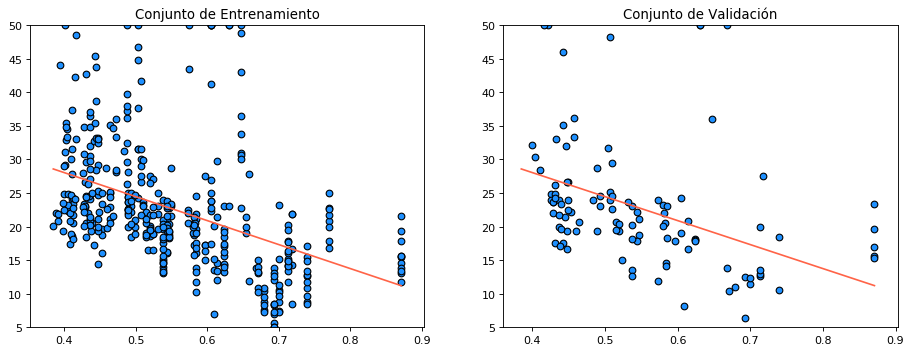

In [5]:
plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
y_range_start = np.min(np.r_[y_train, y_val])
y_range_stop = np.max(np.r_[y_train, y_val])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

#### Regresión polinomial

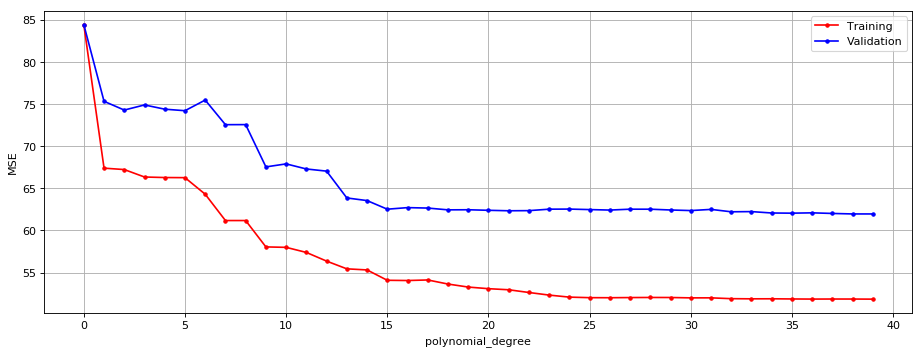

In [6]:
# Estudiamos el efecto de diferentes ordenes
xo=np.arange(0,40); xo_dict={}; xo_list=[]
for xi in xo:
    polynomial_degree =xi # DONE

    poly_features = PolynomialFeatures(polynomial_degree)
    poly_features.fit(X_train_feature)
    X_poly_train = poly_features.transform(X_train_feature)
    X_poly_val = poly_features.transform(X_val_feature)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    mse_train=mean_squared_error(y_train, model.predict(X_poly_train))
    mse_val=mean_squared_error(y_val, model.predict(X_poly_val))
    
    xo_list.append([xi,mse_train,mse_val])
    xo_dict['po_'+str(xi)]={'model':model,'mse_train':mse_train,'mse_val':mse_val,
                           'poly_features':poly_features}
# Graficamos los errores    
xo_array=np.array(xo_list)
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xo_array[:,0],xo_array[:,1],'.-r',xo_array[:,0],xo_array[:,2],'.-b')
plt.grid(True)
plt.xlabel('polynomial_degree')
plt.ylabel('MSE')
plt.legend(['Training','Validation'])
plt.show()

*Observamos la evolución del MSE en funcion del grado del polinomio. El MSE del set de entrenamiento parece disminuir hasta n (orden del polinomio) ~ 14.*    

### Visualización de la regresión polinomial

Veamos un poco que dicen las graficas.

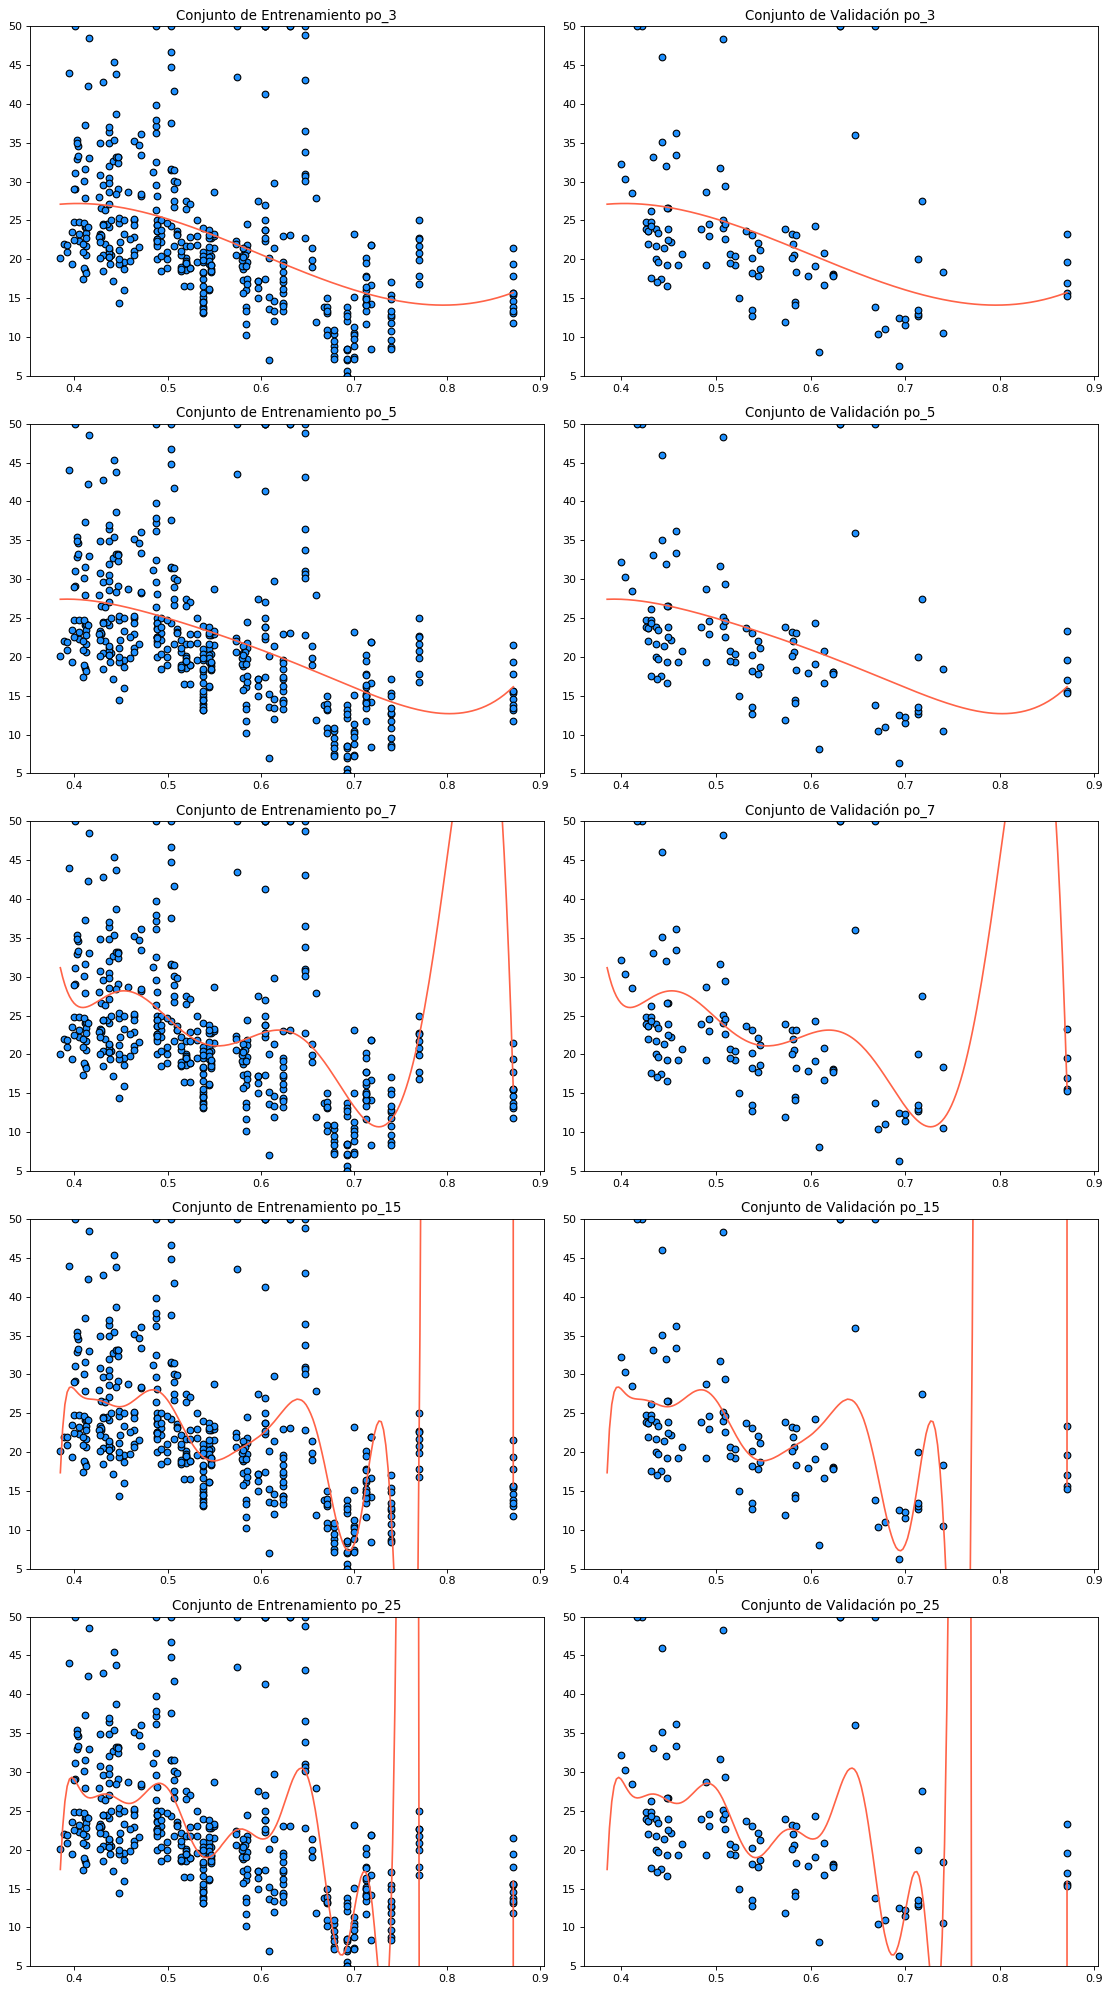

In [7]:
# Utilizamos el diccionario que generamos en el paso anterior
case_pol_list=['po_3','po_5','po_7','po_15','po_25']
j=1;
plt_row=len(case_pol_list)
plt.figure(figsize=(14, 5*plt_row), dpi=80, facecolor='w', edgecolor='k')
for case_pol in case_pol_list:
    model=xo_dict[case_pol]['model']
    poly_features=xo_dict[case_pol]['poly_features']
    X_poly_train = poly_features.transform(X_train_feature)
    X_poly_val = poly_features.transform(X_val_feature)

    X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
    X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
    y_range_start = np.min(np.r_[y_train, y_val])
    y_range_stop = np.max(np.r_[y_train, y_val])
    X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
    X_linspace_poly = poly_features.transform(X_linspace)

    # Conjunto de entrenamiento
    plt.subplot(plt_row, 2, j)
    plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
    plt.ylim(y_range_start, y_range_stop)
    plt.title("Conjunto de Entrenamiento" +' ' +case_pol)
    j=j+1
    # Conjunto de validación
    plt.subplot(plt_row, 2, j)
    plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
    plt.ylim(y_range_start, y_range_stop)
    plt.title("Conjunto de Validación"+' ' +case_pol)
    j=j+1
plt.tight_layout()
plt.show()

*A partir de las graficas observamos que si bien los ordenes mayores disminuyen el error, las oscilaciones que se observan no parecen indicar que sean muy estables o regulares.*

### Regresión con regularización

#### Regresión lineal

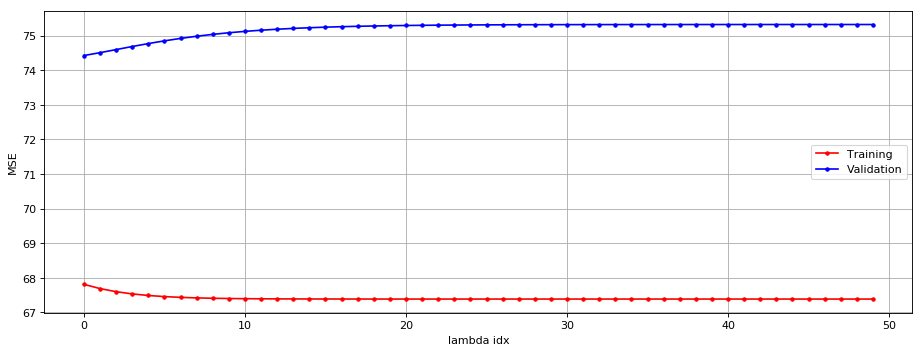

In [8]:
# En todos los casos idx representa el indice del vector correspondiente.
max_iter = 20000  # CONS: Cantidad máxima de iteraciones del algoritmo
tol =10**-5 # FIXED: Precisión del algoritmo (error mínimo entre una iteración y la siguiente)

var_target_name='alpha'; var_target_vec=list(np.exp(-(np.arange(0,10,0.2))))
var_target_name_aux='alpha'; var_target_vec_aux=var_target_vec
model_spec=Ridge(alpha=0.5, max_iter=max_iter, tol=tol)

ridge_lin,ridge_list=mse_model_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)

xl_array=np.array(ridge_list)
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xl_array[:,1],xl_array[:,2],'.-r',xl_array[:,1],xl_array[:,3],'.-b')
plt.grid(True)
plt.xlabel('lambda idx')
plt.ylabel('MSE')
plt.legend(['Training','Validation'])
plt.show()


*Se observa un cambio muy pequeño en el mse variando el parametro de regularizacion.*

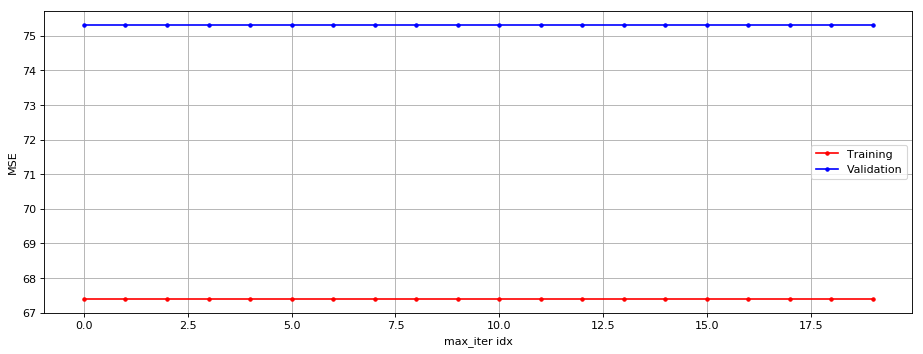

In [9]:
# Veamos las iteraciones

max_iter = 20000  # CONS: Cantidad máxima de iteraciones del algoritmo
tol =10**-7 # FIXED: Precisión del algoritmo (error mínimo entre una iteración y la siguiente)

var_target_name='max_iter'; var_target_vec=list(10.0**(np.arange(0,20,1)))
var_target_name_aux='max_iter'; var_target_vec_aux=var_target_vec
model_spec=Ridge(alpha=0.0001, max_iter=max_iter, tol=tol)

ridge_lin_iter,ridge_list_iter=mse_model_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)

xl_array=np.array(ridge_list_iter)
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xl_array[:,1],xl_array[:,2],'.-r',xl_array[:,1],xl_array[:,3],'.-b')
plt.grid(True)
plt.xlabel('max_iter idx')
plt.ylabel('MSE')
plt.legend(['Training','Validation'])
plt.show()


*No observamos ninguna variacion en el ajuste variando el parametro de maxima iteracion.*

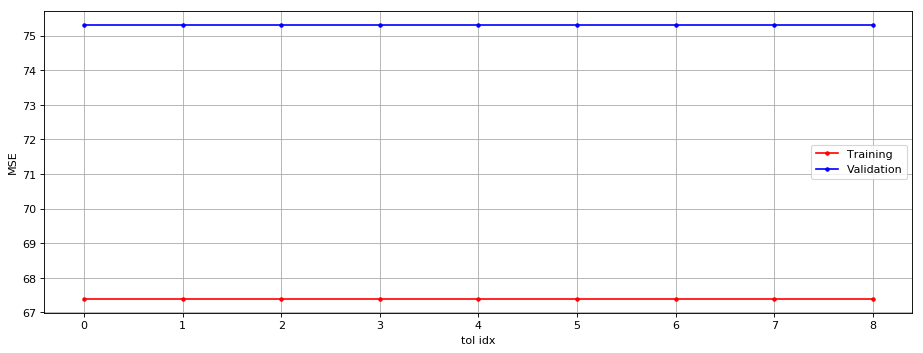

In [10]:
max_iter = 20000  # CONS: Cantidad máxima de iteraciones del algoritmo
tol =10**-7 # FIXED: Precisión del algoritmo (error mínimo entre una iteración y la siguiente)

var_target_name='tol'; var_target_vec=list(10.0**(-np.arange(0,17,2)))
var_target_name_aux='tol'; var_target_vec_aux=var_target_vec
model_spec=Ridge(alpha=0.0001, max_iter=max_iter, tol=tol)

ridge_lin_tol,ridge_list_tol=mse_model_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)

xl_array=np.array(ridge_list_tol)
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xl_array[:,1],xl_array[:,2],'.-r',xl_array[:,1],xl_array[:,3],'.-b')
plt.grid(True)
plt.xlabel('tol idx')
plt.ylabel('MSE')
plt.legend(['Training','Validation'])
plt.show()


*No observamos ninguna variacion en el ajuste variando el parametro de tolerancia.*

##### Visualización de la regresión lineal

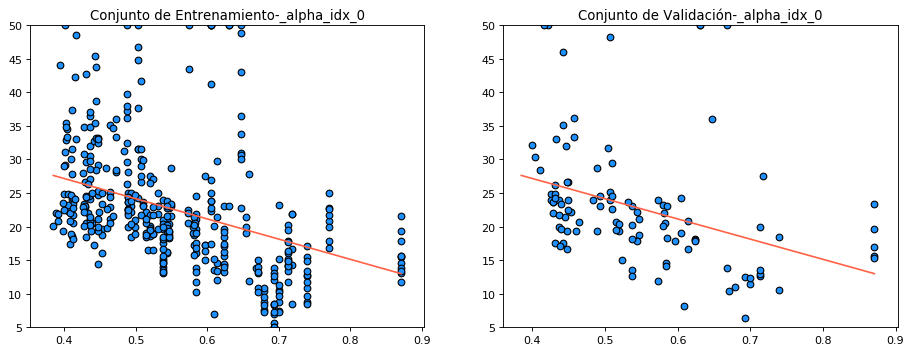

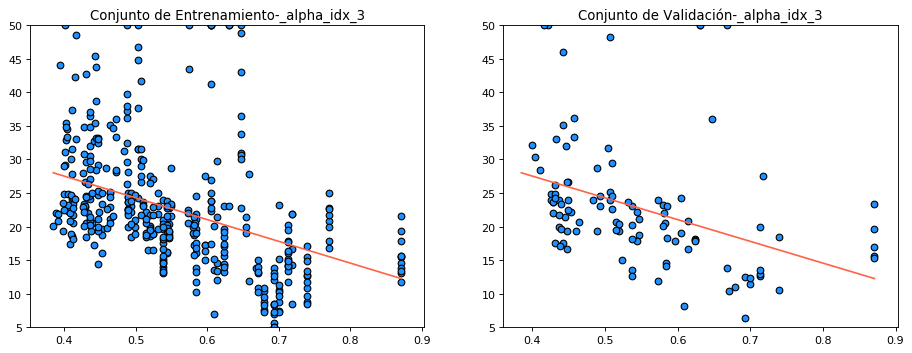

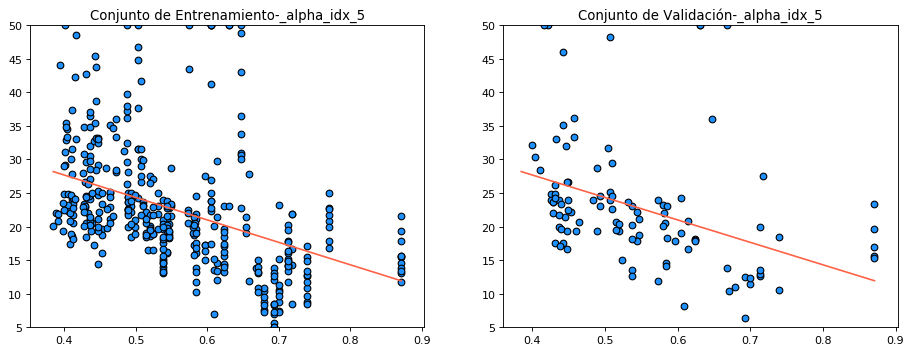

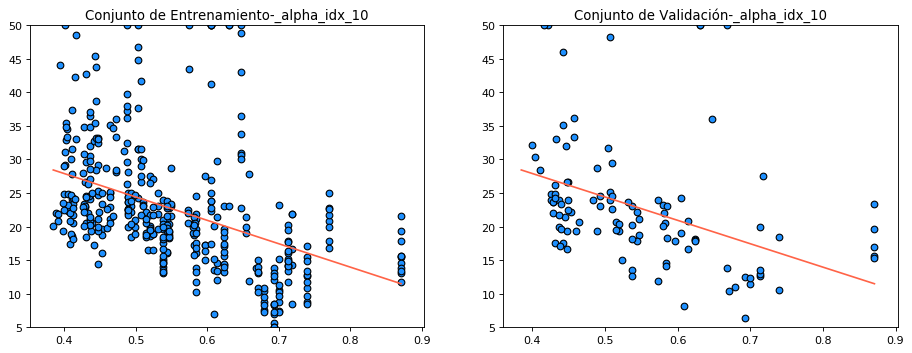

In [11]:
#
case_par='alpha_idx_0'
model=ridge_lin[case_par]['model']
title_add=['_'+case_par,'_'+case_par]
plt_lin_set(model,X_train_feature,X_val_feature,y_train,y_val,title_add)


case_par='alpha_idx_3'
model=ridge_lin[case_par]['model']
title_add=['_'+case_par,'_'+case_par]
plt_lin_set(model,X_train_feature,X_val_feature,y_train,y_val,title_add)

#
case_par='alpha_idx_5'
model=ridge_lin[case_par]['model']
title_add=['_'+case_par,'_'+case_par]
plt_lin_set(model,X_train_feature,X_val_feature,y_train,y_val,title_add)

#
case_par='alpha_idx_10'
model=ridge_lin[case_par]['model']
title_add=['_'+case_par,'_'+case_par]
plt_lin_set(model,X_train_feature,X_val_feature,y_train,y_val,title_add)

Se observa una variacion aunque muy leve.

#### Regresión polinomial

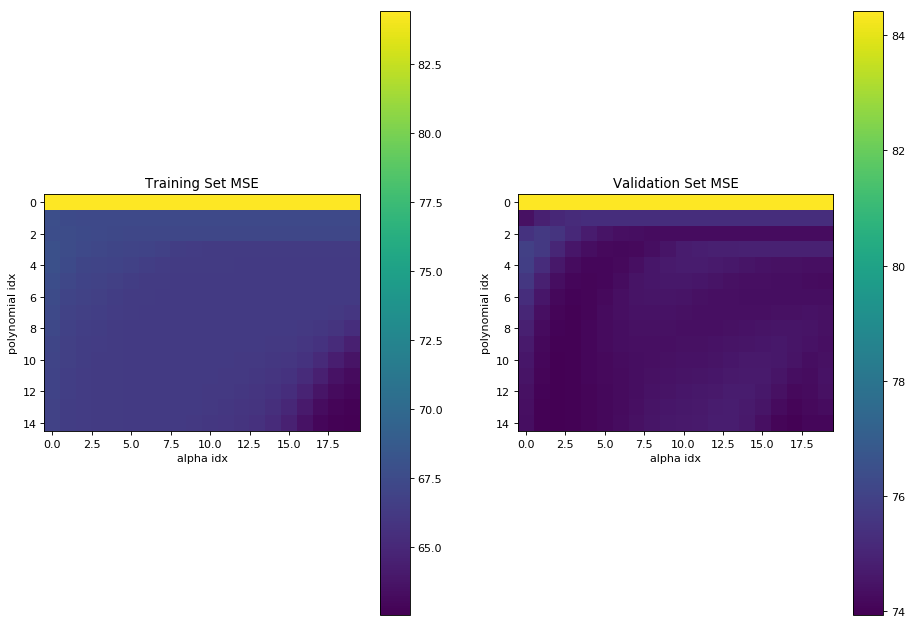

In [12]:
# Estudiamos el efecto de diferentes ordenes
alpha_vec=list(np.arange(0.0001,10,1)); 
max_iter = 20000  # CONS: Cantidad máxima de iteraciones del algoritmo
tol = 0.00001 # FIXED: Precisión del algoritmo (error mínimo entre una iteración y la siguiente)
##### 

var_target_name='po'; var_target_vec=list(np.arange(0,15))
var_target_name_aux='alpha'; var_target_vec_aux=list(np.exp((-np.arange(0,20,1))))
model_spec=Ridge(alpha=0.5, max_iter=max_iter, tol=tol)

ridge_pol,ridge_list_train_val,ridge_list_val_val=mse_model_pol_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)

matrix_train=np.array(ridge_list_train_val);matrix_val=np.array(ridge_list_val_val)
two_par_heatmap(matrix_train,matrix_val,'alpha idx','polynomial idx',['Training Set MSE','Validation Set MSE'])
    
    
    


##### Visualización de la regresión polinomial

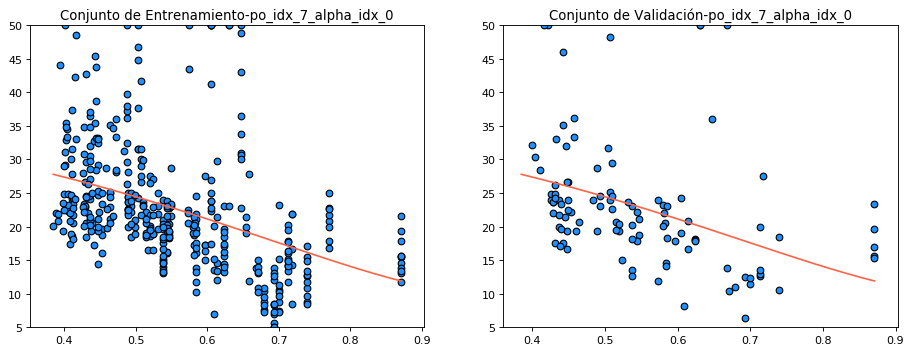

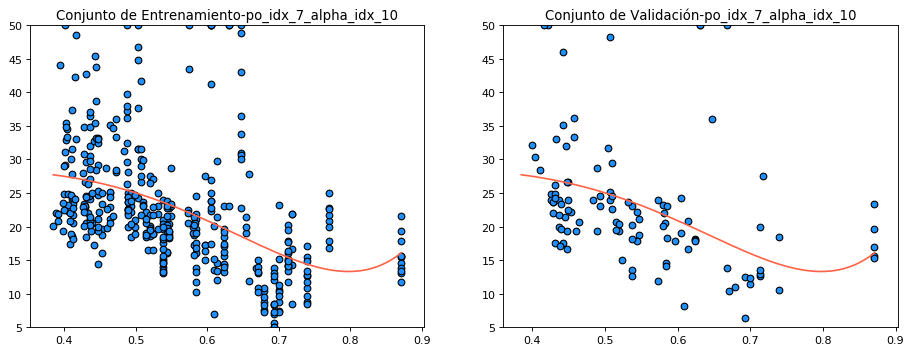

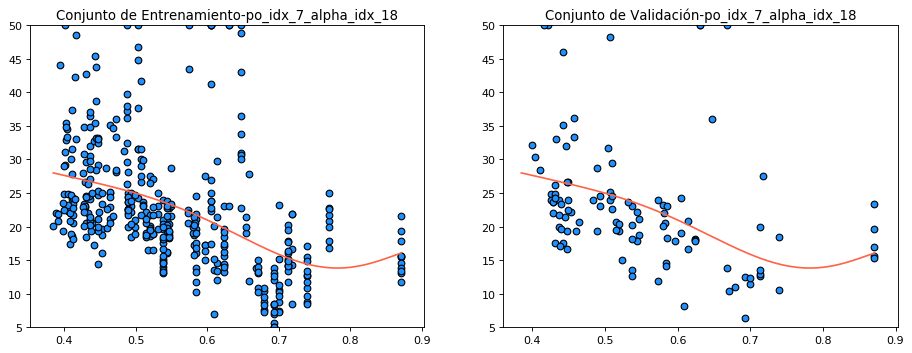

In [13]:
#c1
case_po='po_idx_7';case_par='alpha_idx_0'
model=ridge_pol[case_po][case_par]['model']
poly_features=ridge_pol[case_po][case_par]['poly_features']
title_add=[case_po +'_'+case_par,case_po +'_'+case_par]
plt_reg_pol(model,poly_features,X_train_feature,X_val_feature,y_train,y_val,title_add)

#c2
case_po='po_idx_7';case_par='alpha_idx_10'
model=ridge_pol[case_po][case_par]['model']
poly_features=ridge_pol[case_po][case_par]['poly_features']
title_add=[case_po +'_'+case_par,case_po +'_'+case_par]
plt_reg_pol(model,poly_features,X_train_feature,X_val_feature,y_train,y_val,title_add)


#c2
case_po='po_idx_7';case_par='alpha_idx_18'
model=ridge_pol[case_po][case_par]['model']
poly_features=ridge_pol[case_po][case_par]['poly_features']
title_add=[case_po +'_'+case_par,case_po +'_'+case_par]
plt_reg_pol(model,poly_features,X_train_feature,X_val_feature,y_train,y_val,title_add)

